**Project title :- Bike Renting using Python**

**Problem statement:-** The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

In [111]:
#Loading Libraries:-

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [112]:
os.chdir("D:/Practice-Python")

In [113]:
os.getcwd()

'D:\\Practice-Python'

**Importing the training dataset:-**

In [114]:
df_bike=pd.read_csv("day.csv")
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
#Shape of the dataset
df_bike.shape

(731, 16)

In [65]:
#Summary of the dataset
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Data types:-
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**Rename the columns for better understanding of variables of dataset:-**

In [115]:
#Rename the columns:-
df_bike.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [26]:
df_bike.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [116]:
#Type casting the datetime and numerical attributes to category:-

df_bike['datetime']=pd.to_datetime(df_bike.datetime)

df_bike['season']=df_bike.season.astype('category')
df_bike['year']=df_bike.year.astype('category')
df_bike['month']=df_bike.month.astype('category')
df_bike['holiday']=df_bike.holiday.astype('category')
df_bike['weekday']=df_bike.weekday.astype('category')
df_bike['workingday']=df_bike.workingday.astype('category')
df_bike['weather_condition']=df_bike.weather_condition.astype('category')

In [11]:
#Summary of the dataset
df_bike.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Missing value analysis**:-

In [28]:
#Missing values in the dataset:-
df_bike.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

**Observation:-** There is no missing vale present in the dataset.

**Variable Distribution & Trends:-**

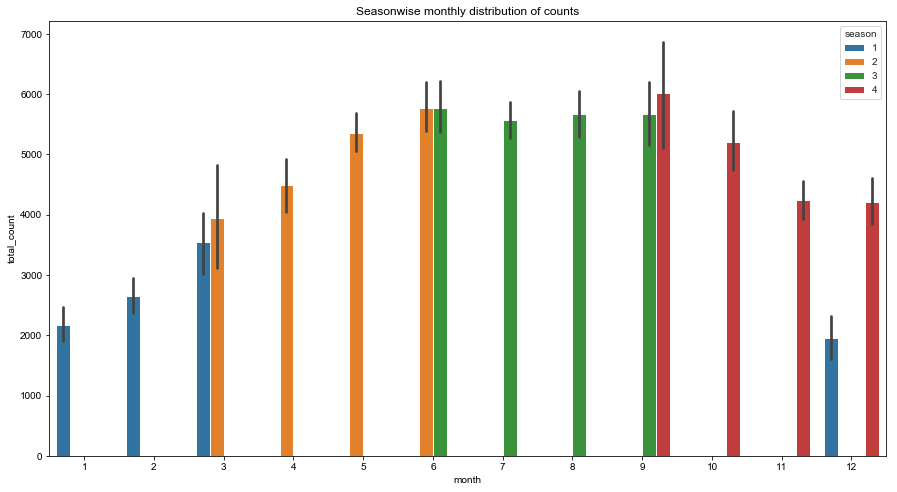

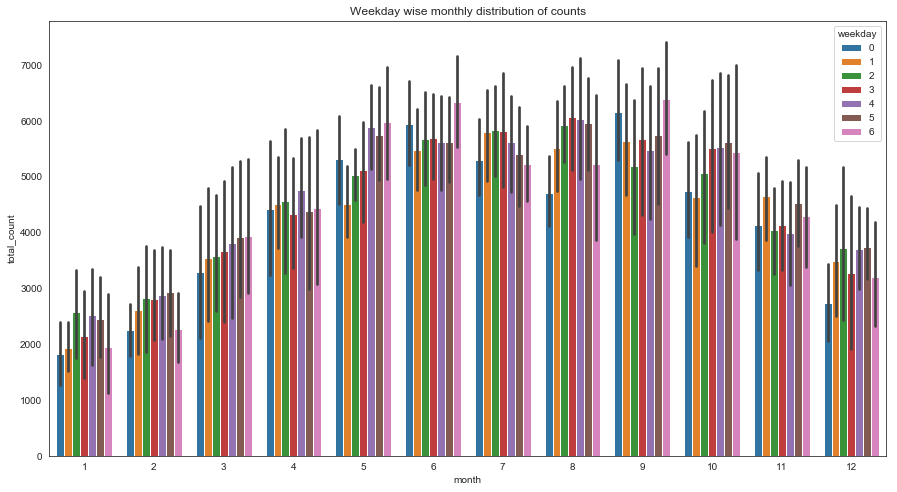

Wall time: 8.55 s


In [68]:
%%time
#Monthly distribution of counts:-
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

#Bar plot for seasonwise monthly distribution of counts:-
sns.barplot(x='month',y='total_count',data=df_bike[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

#Bar plot for weekday wise monthly distribution of counts:-
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df_bike[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

**Observation:-** From the above plots, we can observed that increase in bike rental count in spring & summer season, and then decrease in bike rental count in fall and winter season. 
                 Here season,
                 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

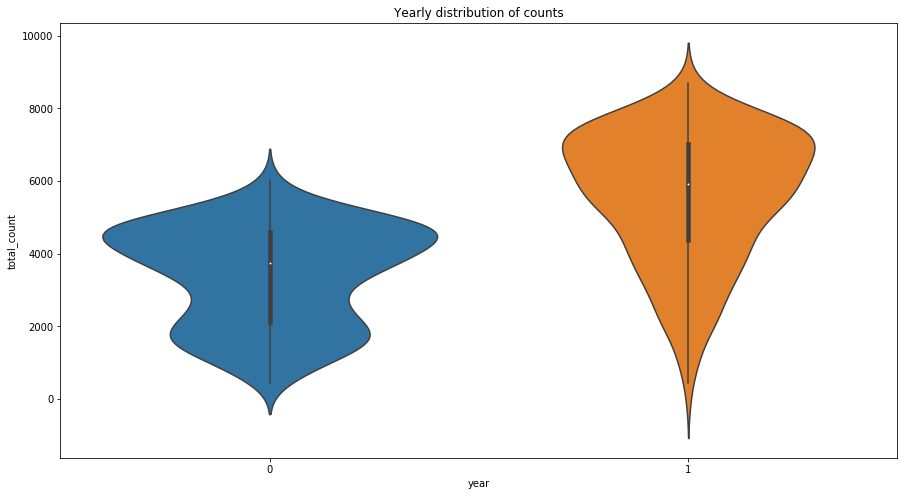

In [28]:
#Yearly distribution of counts:-
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts:-
sns.violinplot(x='year',y='total_count',data=df_bike[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

**Observation:-** From the above violin plot, we can observe that the bike rental count distribution is high in year 2012 than in year 2011.<br>
                 Here,<br>
        0 denotes- Year 2011<br>
        1 denotes- Year 2012<br>

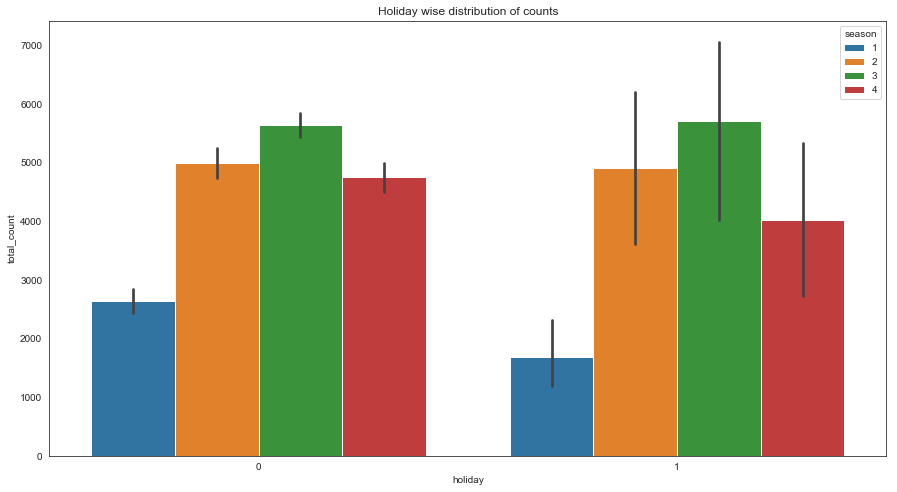

Wall time: 748 ms


In [31]:
%%time
#Holiday wise distribution of counts:-
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

#Barplot for Holiday distribution of counts:-
sns.barplot(data=df_bike,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

**Observation:-** From the above bar plot, we can observe that during no holiday the bike rental counts is high compared to during holiday for different seasons.<br>

Here, 0 -No holiday, 1 -holiday

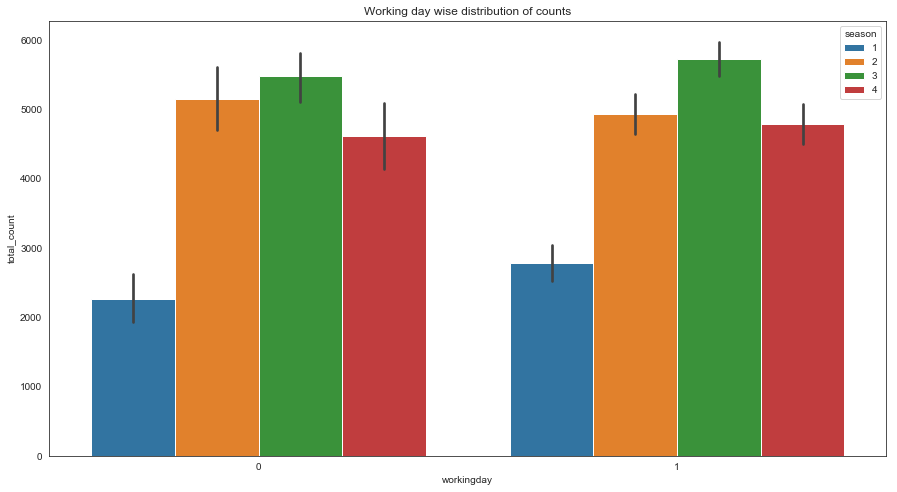

Wall time: 572 ms


In [32]:
%%time
#Working day wise distribution of counts:-
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

#Barplot for Working day distribution of counts:-
sns.barplot(data=df_bike,x='workingday',y='total_count',hue='season')
ax.set_title('Working day wise distribution of counts')
plt.show()

**Observation:-** From the above bar plot, we can observe that during working day the bike rental counts is high compared to during no working day for different seasons.

Here, 0 -No working day, 1 -working day

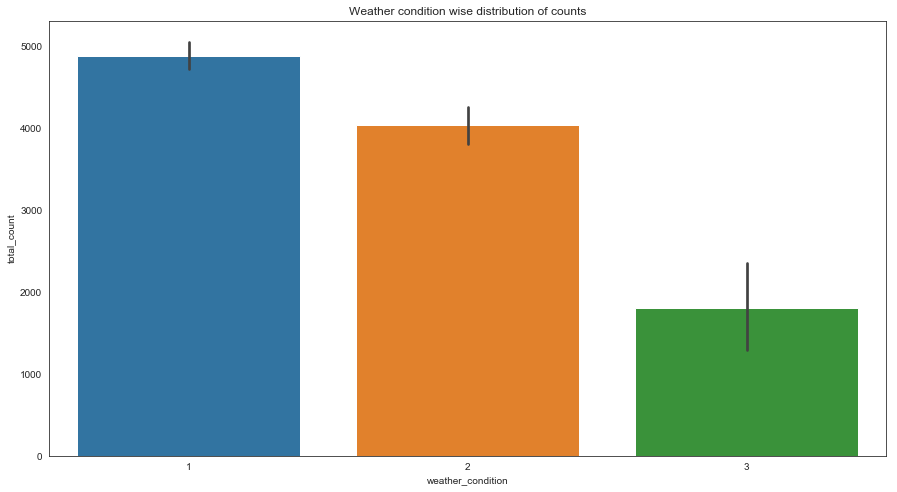

Wall time: 362 ms


In [41]:
%%time
#Weather condition wise distribution of counts:-
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

#Barplot for Weather condition distribution of counts:-
sns.barplot(data=df_bike[['month','total_count','weather_condition']],x='weather_condition',y='total_count')
ax.set_title('Weather condition wise distribution of counts')
plt.show()

**Observation:-** From the above bar plot, we can observe that during clear,partly cloudy weather the bike rental count is high and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

**Outlier Analysis:-**

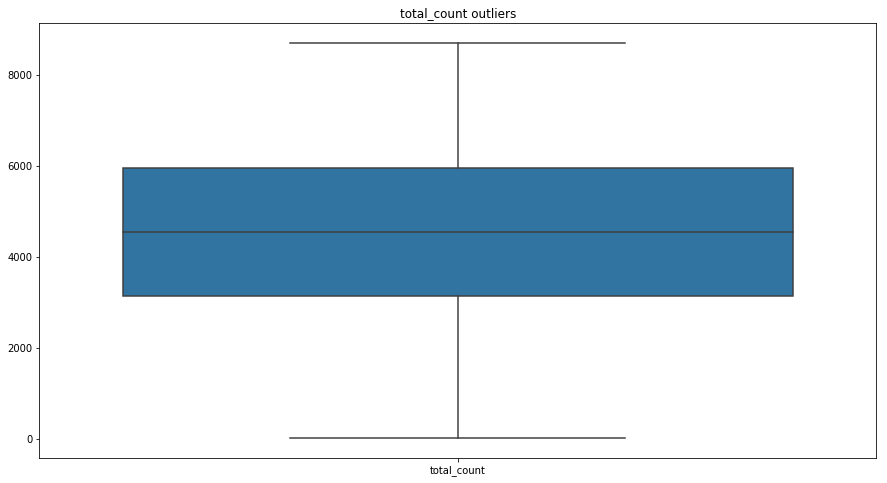

In [44]:
#Total_Count_Outliers:-

fig,ax=plt.subplots(figsize=(15,8))

#Boxplot for total_count outliers
sns.boxplot(data=df_bike[['total_count']])
ax.set_title('total_count outliers')
plt.show()

**Observation:-**From the above box plot, we can observe that no outliers are present in total_count variable.

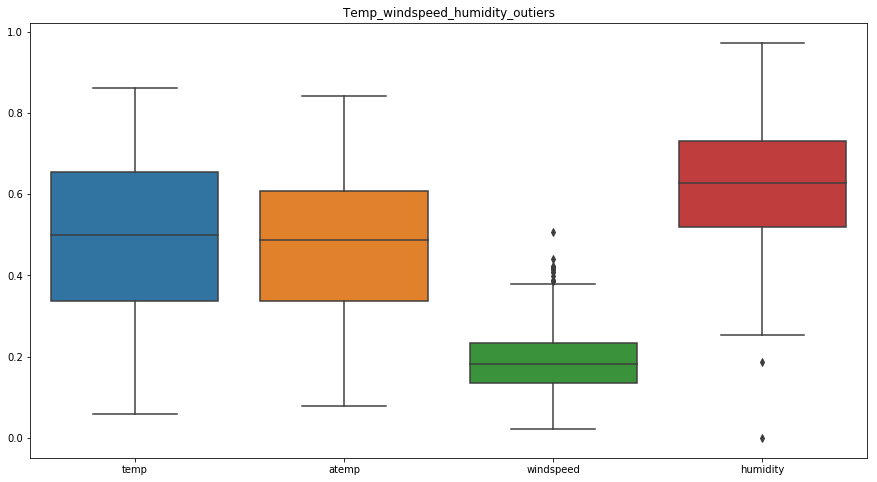

In [45]:
#Temp,atemp,windspeed,humidity outliers:-

fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df_bike[['temp','atemp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

**Observation:-** From the box plot, we can observe that no outliers are present in temp & normalized temp but few outliers are present in windspeed and humidity variable.

In [117]:
%%time
#Replacing & imputing the outliers:-
from fancyimpute import KNN

#create dataframe for outliers:-
wind_hum=pd.DataFrame(df_bike,columns=['windspeed','humidity'])

#Cnames for outliers:-                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75 percentile and 25 percentile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA

Wall time: 42.1 ms


In [118]:
pd.isnull(wind_hum).sum()

windspeed    14
humidity      2
dtype: int64

In [43]:
#wind_hum.iloc[150,0]=0.111329, By mean=0.18639121466480413 By Median=0.17880200000000002 ,By KNN(k=3)=0.0
#wind_hum.iloc[150,1]=0.636667, By mean=0.6293488681318677  By Median=0.6270834999999999  ,By KNN(k=3)=0.0
#wind_hum.iloc[150,0]=np.nan
#wind_hum.iloc[150,1]=np.nan

In [119]:
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].median())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

In [120]:
#Replacing the imputated windspeed
df_bike['windspeed']=df_bike['windspeed'].replace(wind_hum['windspeed'])

#Replacing the imputated humidity
df_bike['humidity']=df_bike['humidity'].replace(wind_hum['humidity'])
df_bike.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Correlation matrix:-**

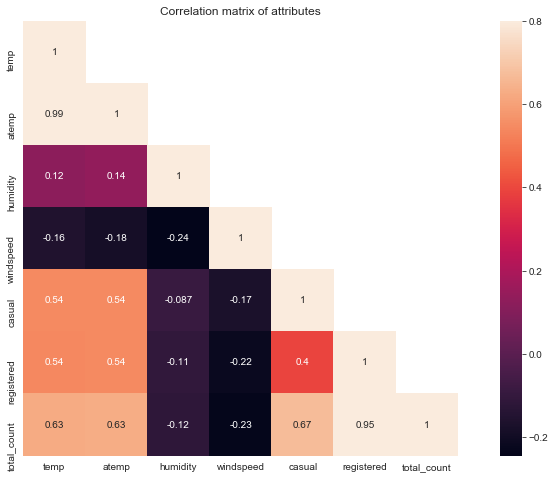

Wall time: 681 ms


In [72]:
%%time
#Create the correlation matrix:-
correMtr=df_bike[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes:-
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

**Observation:-** From correlation plot, we can observe that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

**Feature Scaling:-**

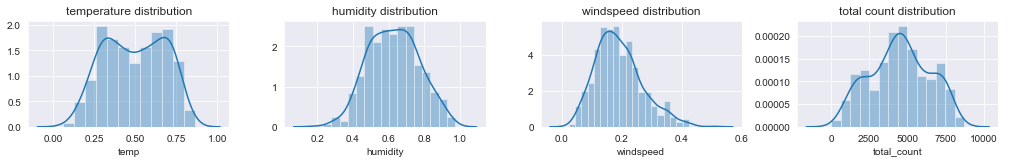

In [44]:
#Scaling for Continious variable :-
plt.figure(figsize=(14,4))

plt.subplot(2,4,1)
sns.distplot(df_bike['temp'])
plt.title('temperature distribution')

plt.subplot(2,4,2)
sns.distplot(df_bike['humidity'])
plt.title('humidity distribution')

plt.subplot(2,4,3)
sns.distplot(df_bike['windspeed'])
plt.title('windspeed distribution')

plt.subplot(2,4,4)
sns.distplot(df_bike['total_count'])
plt.title('total count distribution')

plt.tight_layout()

**Observation:-** Till here, our features are selected and they are already normalized. <br>
So, we don't need to perform feature scaling.

**Modelling the dataset:-**

In [121]:
#load the required libraries:-
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [122]:
#Split the dataset into train and test in the ratio of 70:30:-

#Split the dataset into the train and test data:-
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_bike.iloc[:,0:-3],df_bike.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values:-
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values:-
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 14) (220, 14) (511, 2) (220, 2)
   index  total_count
0    223         4905
1    684         5445
2    685         5698
3    163         5020
4    394         3624
   index  total_count
0    703         6606
1     33         1550
2    300         3747
3    456         6041
4    633         7538


**Split the features into categorical and numerical features:-**

In [123]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [124]:
#Decoding the training attributes:-

#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


**Training dataset:-**

In [125]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

**Linear Regression Model:-**

In [22]:
#Training model:-
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
%%time
#fit the trained model:-
lr_model.fit(X_train,y_train)

Wall time: 118 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Accuracy of model:-**

In [24]:
#Accuracy of the model:-
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8165025087335218
Model coefficients : [  -25.40093273    69.00041734 -1021.83801516  5265.83269167
 -2556.15204574  -949.34444399   229.82675107   -79.72789531
   799.24558823   228.48467064  -228.48467064   -78.95445063
    78.95445063   761.85445399   252.23446226 -1014.08891625
  -989.30080604   989.30080604]
Model intercept value : 2195.3105623488327


**Cross validation prediction:-**

In [25]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 5248.7578435 ,  5038.5615668 ,  5806.79339316,  4353.94868702,
        3738.02165465,  6781.13199665,  6258.53686563,  3802.32154757,
        4679.69060739,  3413.26938345,  5382.26926795,  3103.26413427,
        4340.14502978,  5792.02135524,  4357.90482085,  6307.47067538,
        4382.53420011,  3356.51602988,   722.55880035,   542.99629923,
        7419.07107033,  3747.2639444 ,  5282.38323084,  5494.01243603,
        6941.05375802,  7322.95928003,  3629.5886932 ,  3571.12912785,
         985.45343201,  4884.05952005,  1644.73801661,  1708.88196943,
        1689.90104258,  1295.63879625,  4891.47726849,  5507.81236621,
        6015.17425095,  4180.63057735,  5075.38404498,  5941.56769703,
        6400.40498745,  4215.81855312,  5962.38814912,  6052.71452714,
        3345.73314148,  4096.72004817,  1465.44713372,  3603.17274178,
        4587.89942466,  6650.65699064,  1719.93360965,  6128.15135134,
        6439.33525805,  3277.84008997,  4592.0786174 ,  3194.61235   ,
      

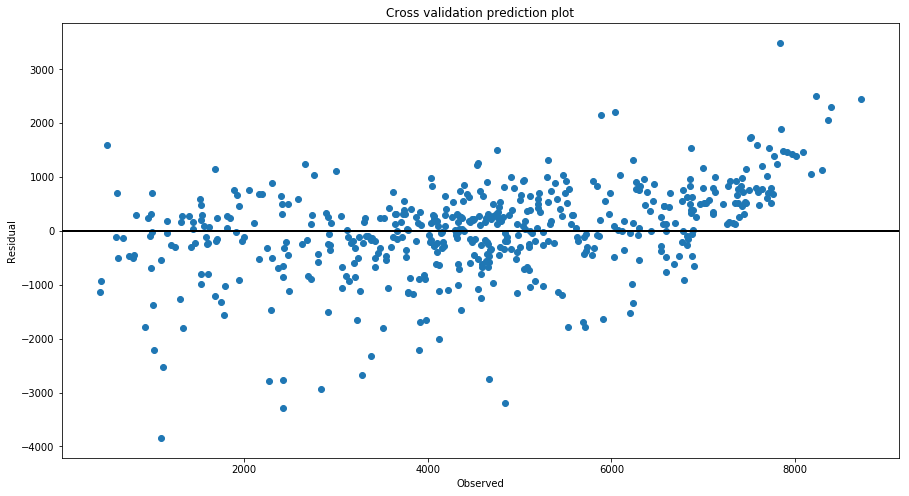

In [26]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**Observation:-** Cross validation prediction plot tells us about finite variance between actual & target values. In above plot., some data points have same finite variance between them and some are not having it.

**Model evaluation Metrics:-**

In [27]:
#R squared score:-
r2_scores=cross_val_score(lr_model,X_train,y_train,cv=3)
print('R squared score:',np.average(r2_scores))

R squared score: 0.7995611885231044


**Observation:-** The R-squared or coefficient of determination is 0.80 for 3 fold cross validation,it means predictor is only able to predict 80% of the variance in the target varibale which is contributed by independednt variables.

In [126]:
#Decoding th test attributes:-
#To get dummy variables to encode the categorical features to numeric:-
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


**Model performance on test dataset:-**

In [127]:
#Test dataset for prediction:-
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [30]:
#Predicting the model:-
lr_pred=lr_model.predict(X_test)
lr_pred

array([6197.12329782, 1378.27938018, 3212.82326914, 4825.6058012 ,
       6672.2308762 , 6942.2039349 ,  693.99373527, 1929.80808599,
       6981.48110092, 6844.67173725, 2798.54559266, 2121.8457389 ,
       4465.68268321, 5486.74428544, 2189.59008463, 1827.67433934,
       2173.48158771, 7469.58027211, 5500.15015098, 2608.49336522,
       6933.20124884, 7837.10306473, 5532.48547104, 1261.13929139,
       1245.46616862, 4479.83361908, 2496.61989036, 6733.37234742,
       3854.86011528, 5802.97615092, 3103.90712661, 4252.34563973,
       6358.26561572, 6798.3144729 , 5790.26253638, 5402.54802544,
       6692.75313381, 5848.44121572, 3180.98457936,  805.80292438,
       4497.72178336, 3746.59014984, 6903.03554988, 4077.94155535,
       6907.0442079 , 1687.7942605 , 4801.49297945, 4723.9530173 ,
       6369.39948476, 4579.39869385, 3105.76669461, 2833.81705416,
       1829.36260472, 5601.65932265, 4625.78263028, 4089.39223053,
       4695.03945324, 3038.41700558, 4351.67190815, 6630.97204

**Model evaluation metrics:-**

In [31]:
#Root mean square error and mean absolute error scores:-
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 783.0616972625063
Mean absolute error : 594.736843023643


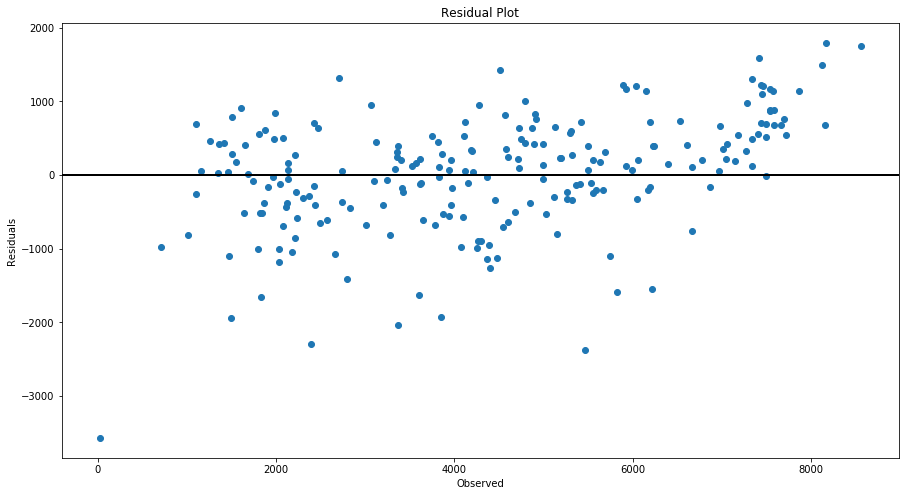

In [32]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

**Observation:-** Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very less data points are have same finite variance between them and for most are not have it.

**Decision tree regressor:-**

In [47]:
#Training the model:-
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [48]:
#Fit the trained model:-
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8082151777539757


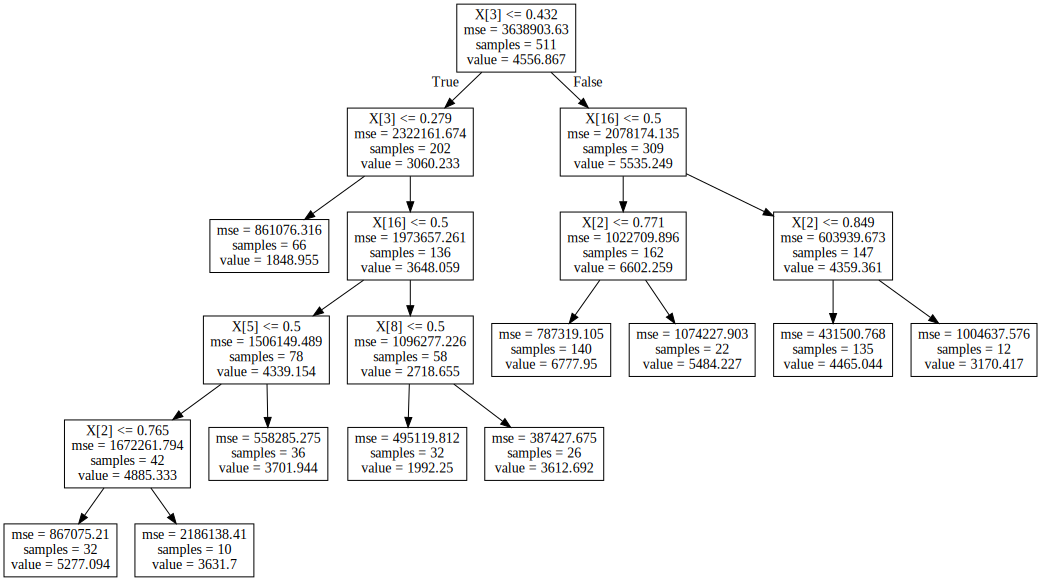

In [21]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [50]:
#Cross validation prediction:-
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([4513.38554217, 4592.56521739, 4592.56521739, 4513.38554217,
       2558.6       , 5388.47058824, 6824.96969697, 4592.56521739,
       4592.56521739, 3603.92857143, 6824.96969697, 3194.22222222,
       4513.38554217, 6824.96969697, 4513.38554217, 6824.96969697,
       3603.92857143, 1636.81818182, 1636.81818182, 1636.81818182,
       6824.96969697, 2558.6       , 4592.56521739, 1027.        ,
       6824.96969697, 6824.96969697, 2558.6       , 4592.56521739,
       1636.81818182, 4513.38554217, 1636.81818182, 1636.81818182,
       1636.81818182, 1636.81818182, 4513.38554217, 5388.47058824,
       6824.96969697, 4592.56521739, 4513.38554217, 6824.96969697,
       6824.96969697, 4513.38554217, 6824.96969697, 6824.96969697,
       4513.38554217, 3194.22222222, 1636.81818182, 4592.56521739,
       4513.38554217, 6824.96969697, 3194.22222222, 6824.96969697,
       6824.96969697, 3603.92857143, 4513.38554217, 1027.        ,
       1636.81818182, 4513.38554217, 1636.81818182, 4513.38554

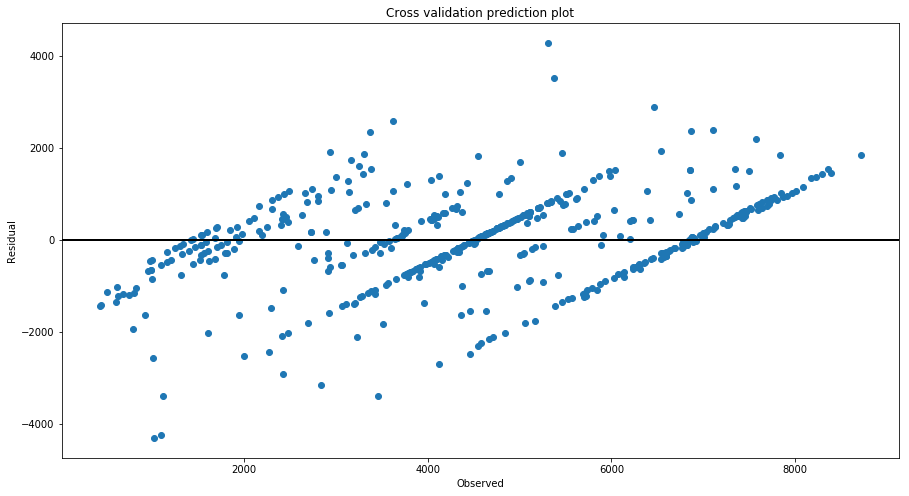

In [51]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**Model Evaluation Metrics:-**

In [52]:
#R-squared scores:-
r2_scores=cross_val_score(dtr,X_train,y_train,cv=3)
print('R squared scores :',np.average(r2_scores))

R squared scores : 0.7294133148789058


**Observation:-** The R sqaured or coefficent of determination is 0.72 on avergae 3-fold cross validation, it means predictor is only able to predict 72% of the variance in the target variable which is contributed by independednt variable.

In [53]:
#Model performance on test dataset:-
dtr_pred=dtr.predict(X_test)
dtr_pred

array([6777.95      , 1848.95454545, 3612.69230769, 5277.09375   ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       4465.04444444, 5277.09375   , 1992.25      , 1992.25      ,
       1992.25      , 6777.95      , 4465.04444444, 1848.95454545,
       6777.95      , 6777.95      , 5277.09375   , 1848.95454545,
       1992.25      , 4465.04444444, 1992.25      , 6777.95      ,
       1848.95454545, 5277.09375   , 1848.95454545, 4465.04444444,
       6777.95      , 6777.95      , 6777.95      , 5484.22727273,
       6777.95      , 6777.95      , 4465.04444444, 1848.95454545,
       4465.04444444, 1848.95454545, 6777.95      , 4465.04444444,
       6777.95      , 3612.69230769, 4465.04444444, 6777.95      ,
       6777.95      , 5484.22727273, 4465.04444444, 1848.95454545,
       1992.25      , 4465.04444444, 4465.04444444, 4465.04444444,
       3170.41666667, 4465.04444444, 4465.04444444, 6777.95   

**Root mean squared error and mean absolute error::-**

In [59]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 925.7976022448886
Mean absolute error : 667.8169018859927


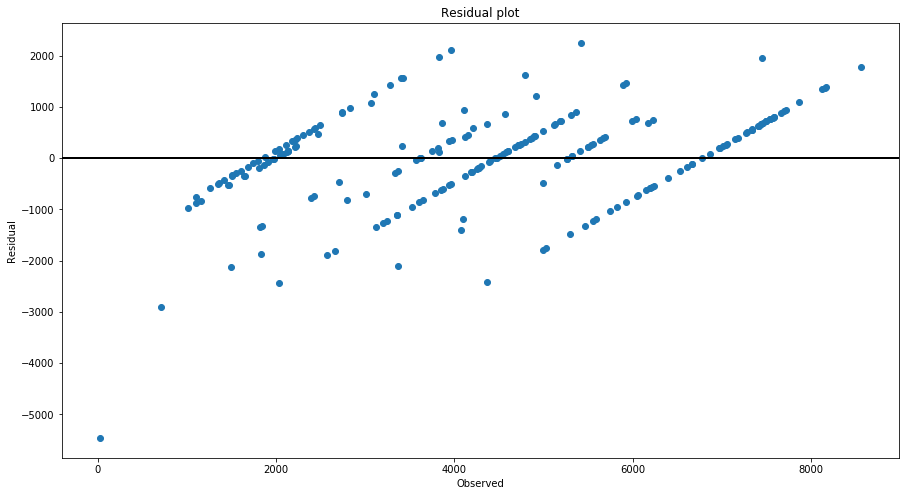

In [60]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

**Observation:-** Residual plot tells us about finite variance between actual target value and predicted target value. In this plot, some data points are having same finite variance between them and some are not having it.

**Random Forest:-**

In [128]:
#Training the model:-
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [129]:
%%time
#Fit the trained model:-
rf.fit(X_train,y_train)

Wall time: 894 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [130]:
#Random Forest accuracy score:-
rf_score=rf.score(X_train,y_train)
rf_score

0.9806187751667007

In [131]:
#Cross validation prediction:-
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([4952.24 , 4805.05 , 5327.64 , 4792.905, 2998.24 , 5757.175,
       6529.82 , 3792.895, 4267.88 , 3655.545, 6003.85 , 3427.515,
       4263.7  , 6887.97 , 4950.51 , 6628.765, 4071.05 , 2658.455,
       1167.82 , 1413.84 , 6218.82 , 3333.005, 4846.635, 4528.17 ,
       7160.595, 6221.585, 3220.715, 4033.515, 1417.595, 5005.725,
       1027.32 , 1845.435, 1471.645, 1973.485, 4710.645, 4994.335,
       6704.17 , 4070.37 , 4310.385, 6049.425, 6509.09 , 4280.405,
       7013.67 , 6305.04 , 4466.965, 3435.98 , 1296.6  , 4033.09 ,
       4655.495, 6613.03 , 2867.415, 6416.29 , 6609.36 , 3516.845,
       4953.715, 3205.315, 1371.875, 4155.72 , 1063.95 , 4623.245,
       5528.515, 4155.695, 3590.99 , 5619.205, 4416.795, 6795.59 ,
       4582.32 , 3198.145, 3813.815, 4329.375, 3612.06 , 4447.2  ,
       7128.99 , 3826.575, 4988.63 , 2461.385, 2453.79 , 4561.855,
       2157.015, 4341.49 , 4326.98 , 4692.14 , 4151.765, 2097.06 ,
       7574.32 , 4355.59 , 4693.75 , 7360.595, 4607.21 , 4206.

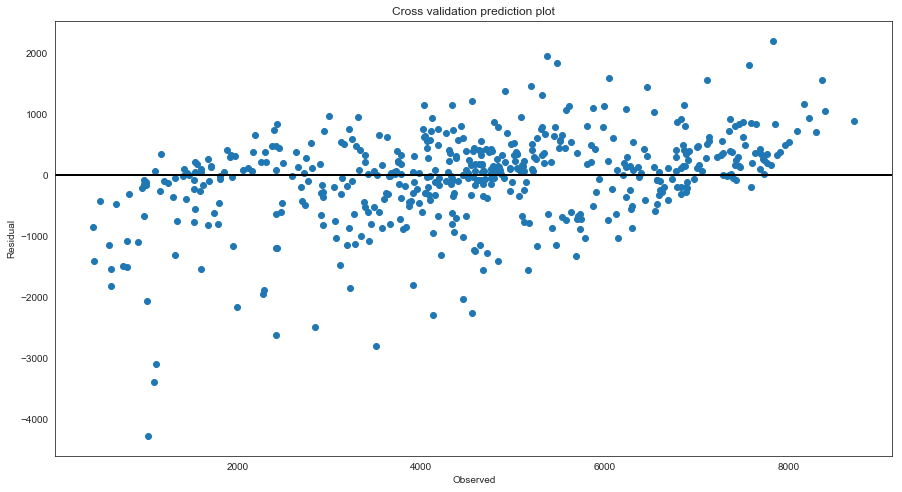

In [132]:
#Cross validation prediction plot:-
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**Observation:-** Cross validation prediction tells us about finite variance between actual target value and predicted target value.<br>
    In this plot, some data points have finite varaince and for some not have the same.

In [133]:
#R-squared scores:-
r2_scores=cross_val_score(rf,X_train,y_train,cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8498184185137495


**Observation:-** The R-squared or coefficient of determination is 0.85 on avaerage 3 fold cross validation, it means that predictor is able to predict 85% of variance in the target varaible which is contributed by independednt variables.

In [134]:
#Model performance on test dataset:-
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([6649.565, 1552.48 , 3363.1  , 5090.66 , 7476.305, 7226.295,
       1487.07 , 2233.555, 7370.705, 6396.72 , 2124.515, 2875.305,
       4985.235, 5025.345, 2129.86 , 2130.415, 2283.925, 7843.46 ,
       5019.145, 2475.22 , 7491.645, 6098.075, 5866.325, 1785.125,
       1698.34 , 4746.625, 1853.27 , 7191.725, 3153.705, 5705.94 ,
       2923.035, 4068.58 , 6582.145, 7295.795, 6160.51 , 5449.49 ,
       7237.93 , 6293.205, 3252.895,  917.285, 3828.77 , 3252.07 ,
       7244.85 , 4461.65 , 6894.35 , 2296.145, 4332.745, 5636.92 ,
       6598.19 , 4378.755, 4242.735, 2828.955, 2290.035, 4392.335,
       4662.425, 4194.685, 3521.88 , 3712.62 , 4305.88 , 6596.455,
       6203.805, 6778.965, 1929.87 , 7337.9  , 6516.4  , 6412.365,
       5911.415, 4395.74 , 1938.875, 7424.475, 3575.41 , 2137.42 ,
       3190.685, 4029.36 , 4272.365, 3855.765, 4692.735, 4528.875,
       1339.305, 4305.815, 2343.15 , 1965.515, 4985.94 , 4281.35 ,
       3632.52 , 3444.03 , 4023.91 , 3755.255, 3473.145, 3389.

**Root mean squared error and Mean absolute error:-**

In [135]:
#Root mean squared error:-
rmse=math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean squared error :',rmse)

#Mean absolute error:-
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean sqaured error :',mae)

Root mean squared error : 642.5521377193661
Mean sqaured error : 424.2433636363636


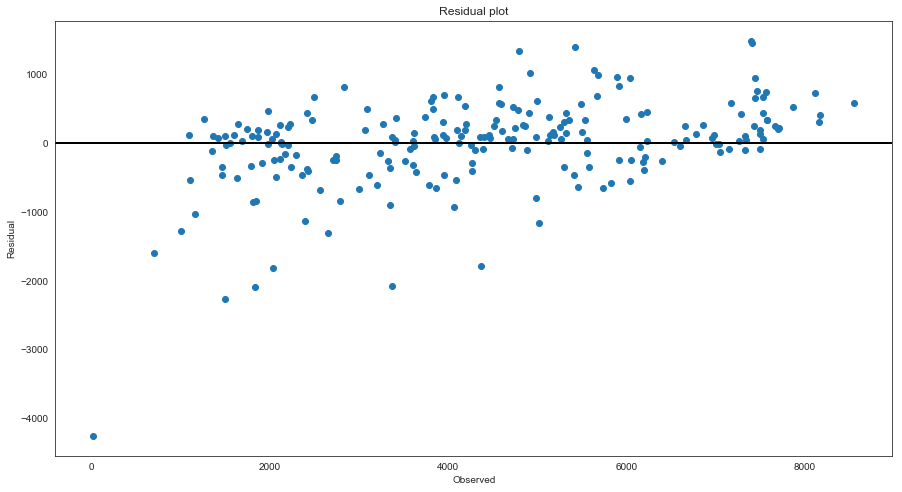

In [136]:
#Residual scatter plot:-
residuals = y_test-rf_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

**Observation:-** Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very less data points are have same finite variance between them and for most are not have it.

**Final model for predicting the Bike rental count:-** When we compare the root mean sqaured error and mean absolute error for all three models. The Random Forest has less root mean sqaured error and mean absolute error. <br>
So,finally random forest is best for predicting the bike rental count.

In [137]:
df1_bike=pd.DataFrame(y_test,columns=['y_test'])
df2_bike=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(df1_bike,df2_bike,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Rent_Python.csv')
Bike_predictions

,y_test,rf_pred
0,6606,6649.565
1,1550,1552.480
2,3747,3363.100
3,6041,5090.660
4,7538,7476.305
5,7264,7226.295
6,1605,1487.070
7,2209,2233.555
8,7499,7370.705
9,5743,6396.720
